In [70]:
import random
import string

def generate_messages():
    messages = []

    for _ in range(5000):
        random_string = ''.join(random.choices(string.ascii_letters, k=random.randint(5, 15)))
        encoded_string = random_string.encode('utf-8')
        messages.append(encoded_string)

    return messages

In [71]:
messages = generate_messages()

In [72]:
import hashlib
import timeit
import matplotlib.pyplot as plt
import psutil

In [73]:
def test_hash_speed(messages):
    times = []

    for message in messages:
        time = timeit.timeit(lambda: hashlib.md5(message).hexdigest(), number=10000)
        times.append(time)

    plt.plot(range(len(messages)), times)
    plt.xlabel('Message')
    plt.ylabel('Time (seconds)')
    plt.title('MD5 Hashing Speed')
    plt.show()

    total_time = sum(times)
    avg_speed = total_time / (10000 * len(messages))

    print(f"Average Hashing Speed: {avg_speed} seconds")

In [74]:
def test_hash_size():
    # Тестирование размера хеш-функции
    hash_size = len(hashlib.md5().digest()) * 8
    print(f"MD5 hash size: {hash_size} bits")

In [75]:
def test_commonality():
    # Тестирование распространенности и поддержки
    # Можно проверить документацию и поддержку модуля hashlib
    try:
        hashlib.md5()
        print("MD5 support: Yes")
    except Exception as e:
        print("MD5 support: No")
        print(f"Error: {e}")

In [76]:
def test_vulnerabilities():
    # Тестирование уязвимостей и атак
    # Можно использовать специализированные инструменты для проведения атак

    # Пример атаки на коллизии
    message1 = b'message1'
    message2 = b'message2'

    hash1 = hashlib.md5(message1).digest()
    hash2 = hashlib.md5(message2).digest()

    if hash1 == hash2:
        print("Collision found")
    else:
        print("No collision")

In [77]:
def test_resource_requirements(messages):
    # Тестирование требований к ресурсам
    memory_usage = []
    cpu_usage = []

    for i, message in enumerate(messages):
        start_time = timeit.default_timer()
        hashlib.md5(message).hexdigest()
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time

        # Получить информацию о потреблении ресурсов
        cpu_usage.append(elapsed_time)

    plt.plot(range(len(cpu_usage)), cpu_usage, label='CPU Usage')
    plt.xlabel('Message Number')
    plt.ylabel('Resource Usage')
    plt.title('MD5 Resource Requirements')
    plt.legend()

    average_cpu_usage = sum(cpu_usage) / len(cpu_usage)
    plt.axhline(y=average_cpu_usage, color='r', linestyle='--', label='Average CPU Usage')

    plt.legend()
    plt.show()

    print(f"Average CPU Usage: {average_cpu_usage}")


In [78]:
import resource
def memory_usage_of_md5(messages):
    # Testing memory usage of MD5 hashing for each message
    mem_usages = []
    message_numbers = list(range(len(messages)))

    for message in messages:
        start_time = timeit.default_timer()
        hashlib.md5(message).hexdigest()
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time

        # Getting memory usage information
        memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024 / 1024  # Convert to MiB
        mem_usages.append(memory)

    # Plot the graph
    plt.plot(message_numbers, mem_usages, marker='o')
    plt.xlabel('Message Number')
    plt.ylabel('Memory Usage (MiB)')
    plt.title('Memory Usage of MD5')
    plt.show()

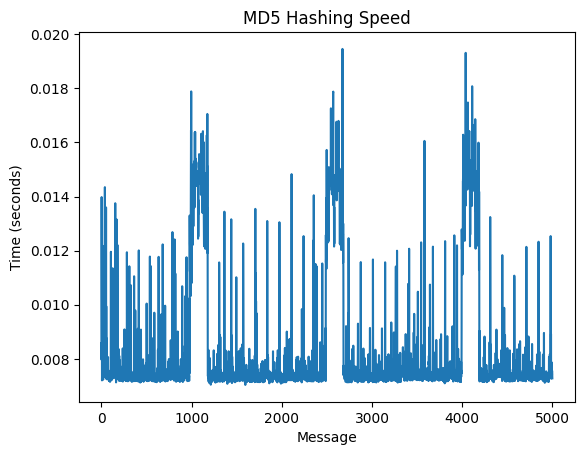

Average Hashing Speed: 8.352723609200302e-07 seconds
MD5 hash size: 128 bits
No collision


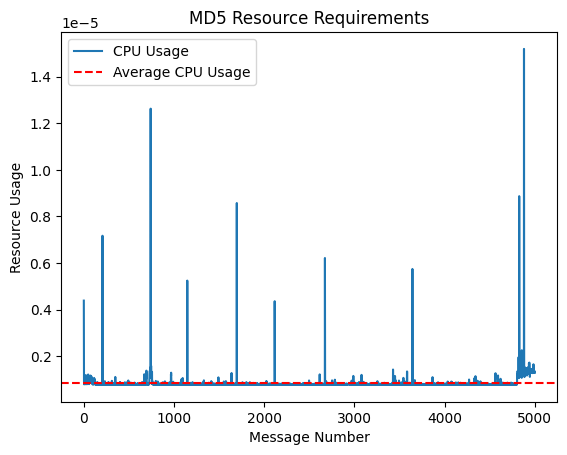

Average CPU Usage: 8.397151992994622e-07


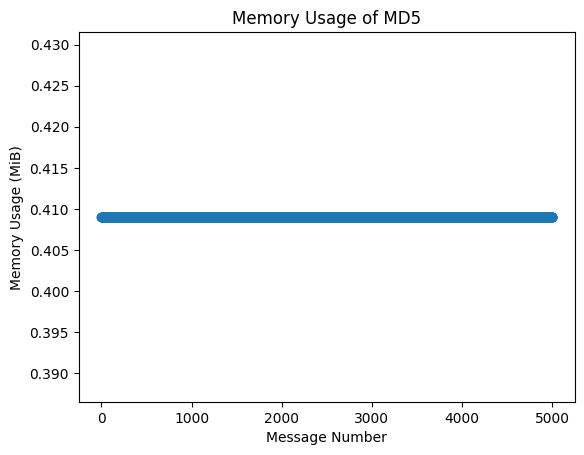

In [79]:
# Тестирование скорости хеширования и построение графика
test_hash_speed(messages)

# Тестирование размера хеш-функции
test_hash_size()

# Тестирование уязвимостей и атак
test_vulnerabilities()

# Тестирование требований к ресурсам и построение графика
test_resource_requirements(messages)

memory_usage_of_md5(messages)


"Использование памяти (MiB)" обозначает использование памяти в мебибайтах (MiB).

Мебибайт (MiB) - это двоичная единица измерения информации, которая является кратной байту. Она равна 2^20 байт, что примерно равно 1 048 576 байтам. "Ми" в слове "мебибайт" происходит от термина "мега", который означает миллион.

Использование памяти обычно измеряется в мебибайтах (MiB) или в других единицах, таких как килобайты (KB) или гигабайты (GB), чтобы указать объем памяти, используемый программой или процессом. В контексте примера кода это представляет собой объем памяти, занимаемой процессом хеширования MD5, в единицах мебибайтов.

In [80]:

# Тестирование распространенности и поддержки
test_commonality()


MD5 support: Yes
